In [153]:
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support
df=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students.csv')#[['Growth','Weight','Hair length','Children number','Sex']].dropna()
df_test=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students_test.csv')#[['Growth','Weight','Hair length','Children number','Sex']].dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

In [10]:
from sklearn import preprocessing
coder=preprocessing.LabelEncoder()
coder.fit(df['Sex'])
df['Sex']=coder.transform(df['Sex'])

In [45]:
for name in ['Coin','Animal','Army','Sex']:
    coder.fit(df[name])
    df[name]=coder.transform(df[name])
    
    
for name in ['Coin','Animal','Army','Sex']:
    coder.fit(df_test[name])
    df_test[name]=coder.transform(df_test[name])

In [46]:
df_cut=df[['Growth','Weight','Hair length','Children number','Coin','Animal','Army','Sex']].dropna()
df_cut_test=df_test[['Growth','Weight','Hair length','Children number','Coin','Animal','Army','Sex']].dropna()

In [47]:
modelTree=tree.DecisionTreeClassifier(max_depth=4)
modelTree.fit(df_cut[['Growth','Weight','Hair length','Children number','Coin','Animal','Army']].values.reshape(-1,7),df_cut['Sex'].values)
df_cut_test['Predicted Sex']=modelTree.predict(df_cut_test[['Growth','Weight','Hair length','Children number','Coin','Animal','Army']].values.reshape(-1,7))

In [48]:
df_cut_test

,Growth,Weight,Hair length,Children number,Coin,Animal,Army,Sex,Predicted Sex
0,180.0,78.0,1.2,2.0,0,2,1,1,1
1,167.0,50.0,30.0,2.0,0,0,1,0,0
3,156.0,47.0,20.0,2.0,0,0,1,0,0
5,150.0,40.0,30.0,2.0,0,0,1,0,0
7,183.0,80.0,2.0,0.0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...
92,171.0,47.0,95.0,2.0,1,0,1,0,0
93,183.0,68.0,8.0,0.0,0,2,0,1,1
94,168.0,67.0,87.0,4.0,0,2,1,0,0
96,168.0,60.0,60.0,1.0,0,0,1,0,0


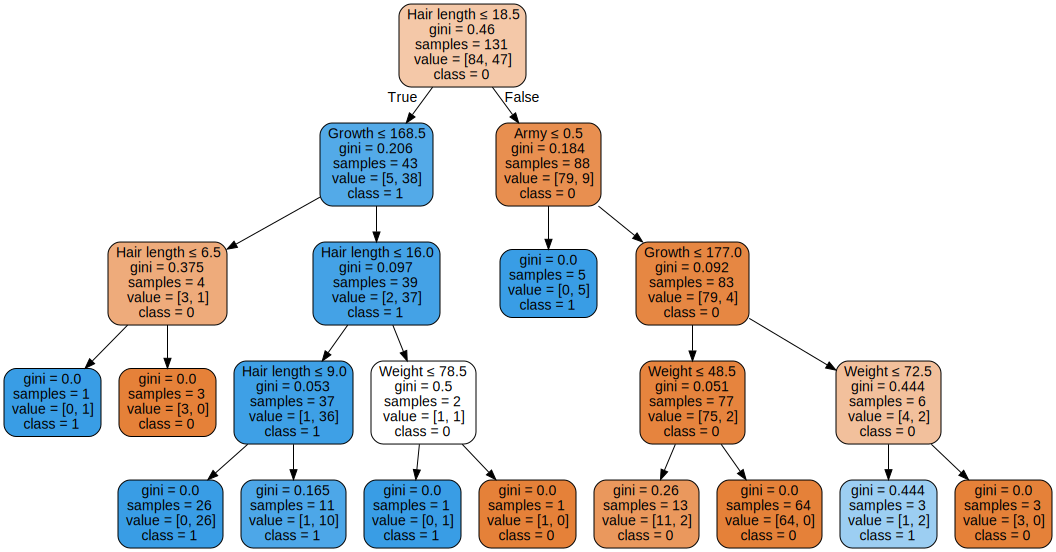

In [51]:
import graphviz
dot_data = tree.export_graphviz(modelTree, out_file=None,
                                feature_names=['Growth','Weight','Hair length','Children number','Coin','Animal','Army',],
                                class_names=['0','1'], 
                                filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [56]:
pd.crosstab(df_cut_test['Predicted Sex'],df_cut_test['Sex'])

Sex,0,1
Predicted Sex,,
0,40,0
1,2,26


In [59]:
df_cut_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 97
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Growth           68 non-null     float64
 1   Weight           68 non-null     float64
 2   Hair length      68 non-null     float64
 3   Children number  68 non-null     float64
 4   Coin             68 non-null     int64  
 5   Animal           68 non-null     int64  
 6   Army             68 non-null     int64  
 7   Sex              68 non-null     int64  
 8   Predicted Sex    68 non-null     int64  
dtypes: float64(4), int64(5)
memory usage: 5.3 KB


In [78]:
coder2=preprocessing.LabelEncoder()
for name in df.select_dtypes(include=['object']).columns:
    coder2.fit(df[name])
    df[name]=coder2.transform(df[name])
df['Glasses'].value_counts()

1    58
0    55
2     5
Name: Glasses, dtype: int64

In [104]:
from sklearn.ensemble import ExtraTreesClassifier
selector=ExtraTreesClassifier()
result=selector.fit(df[df.columns],df['Sex'])

In [105]:
table=pd.DataFrame(result.feature_importances_,index=df.columns,columns=['Importence'])
table.sort_values(by='Importence',ascending=False)

,Importence
Sex,0.348235
Army,0.119093
Shoe size,0.103417
Hair length,0.080442
Growth,0.061815
Coin,0.037548
Computer science rating,0.036933
Plane seat,0.011554
Weight,0.011387
Middle and ring finger,0.011253


In [124]:
df_new_cut=df[['Army','Shoe size','Hair length','Growth','Coin','Computer science rating','Weight','Sex']]
df_new_cut=df_new_cut.dropna()
df_new_cut_test=df_test[['Army','Shoe size','Hair length','Growth','Coin','Computer science rating','Weight','Sex']]
df_new_cut_test=df_new_cut_test.dropna()
df_new_cut=pd.get_dummies(df_new_cut,drop_first=True)
df_new_cut_test=pd.get_dummies(df_new_cut_test,drop_first=True)
df_new_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 185
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Shoe size                              157 non-null    int64  
 1   Hair length                            157 non-null    float64
 2   Growth                                 157 non-null    int64  
 3   Computer science rating                157 non-null    int64  
 4   Weight                                 157 non-null    float64
 5   Army_не призовут (по разным причинам)  157 non-null    uint8  
 6   Coin_Решка                             157 non-null    uint8  
 7   Sex_мужской                            157 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 7.8 KB


In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
modelTree2=RandomForestClassifier(max_depth=1,random_state=0)
#modelTree2=GradientBoostingClassifier(random_state=0)
modelTree2=tree.DecisionTreeClassifier(max_depth=4)
modelTree2.fit(df_new_cut[['Army_не призовут (по разным причинам)',
                           'Shoe size','Hair length','Growth','Coin_Решка',
                           'Computer science rating','Weight']].values.reshape(-1,7),df_new_cut['Sex_мужской'].values)
df_new_cut_test['Predicted Sex мужской']=modelTree2.predict(df_new_cut_test[['Army_не призовут (по разным причинам)',
                           'Shoe size','Hair length','Growth','Coin_Решка',
                           'Computer science rating','Weight']].values.reshape(-1,7))
df_new_cut_test
pd.crosstab(df_new_cut_test['Predicted Sex мужской'],df_new_cut_test['Sex_мужской'])

Sex_мужской,0,1
Predicted Sex мужской,,
0,46,0
1,1,30


In [85]:
df.corr()

,Age,Growth,Shoe size,Course number,Year of birth,Friend number,Russian rating,Maths rating,Physics rating,Computer science rating,...,Social network duration min,Chocolate,City population,Strange people,Your insitute,Brother-sister,Plane seat,MIddle and index finger,Middle and ring finger,Middle and little finger
Age,1.000000,-0.145723,-0.134698,0.605694,-0.052321,0.019807,-0.412664,-0.089564,-0.052760,-0.198024,...,-0.020099,0.039383,0.025486,0.097922,-0.028985,-0.031172,-0.009149,-0.010920,0.012422,-0.140471
Growth,-0.145723,1.000000,0.880931,-0.135188,-0.133265,-0.103809,-0.132782,0.228049,0.253644,0.378392,...,-0.073031,0.063919,-0.051351,-0.031386,-0.112335,-0.099378,-0.116178,0.161730,-0.121819,0.087936
Shoe size,-0.134698,0.880931,1.000000,-0.147265,-0.123784,-0.192558,-0.164057,0.195151,0.272717,0.352795,...,-0.085745,0.046149,-0.089526,0.042327,-0.029177,-0.119222,-0.208417,0.143797,-0.174391,0.102040
Course number,0.605694,-0.135188,-0.147265,1.000000,-0.048748,-0.028527,-0.026894,0.012762,0.098466,-0.281362,...,-0.061580,0.141244,0.035082,-0.020192,0.018793,0.030270,0.014517,-0.084531,-0.009066,-0.060320
Year of birth,-0.052321,-0.133265,-0.123784,-0.048748,1.000000,0.012783,-0.067259,0.022721,0.048414,-0.058632,...,0.009348,-0.098757,-0.032562,0.039007,0.041272,-0.053822,-0.207476,0.101178,0.000117,0.020630
Friend number,0.019807,-0.103809,-0.192558,-0.028527,0.012783,1.000000,0.014661,-0.191047,-0.055534,-0.106153,...,-0.012420,-0.075322,0.245236,0.051651,-0.088385,0.047563,0.207953,0.132008,-0.097969,-0.031703
Russian rating,-0.412664,-0.132782,-0.164057,-0.026894,-0.067259,0.014661,1.000000,0.181834,-0.152042,0.066473,...,0.045587,0.029161,-0.074536,-0.107248,0.110258,-0.023018,0.151611,-0.071487,0.019925,0.126809
Maths rating,-0.089564,0.228049,0.195151,0.012762,0.022721,-0.191047,0.181834,1.000000,0.278265,0.536506,...,0.069534,0.029713,0.005096,-0.085361,-0.392499,-0.051572,-0.100741,0.029868,-0.042154,0.109222
Physics rating,-0.052760,0.253644,0.272717,0.098466,0.048414,-0.055534,-0.152042,0.278265,1.000000,0.232509,...,0.217626,0.033273,0.079492,-0.005639,-0.265267,-0.047928,-0.175810,0.056716,-0.136855,-0.010433
Computer science rating,-0.198024,0.378392,0.352795,-0.281362,-0.058632,-0.106153,0.066473,0.536506,0.232509,1.000000,...,-0.081883,0.036988,0.041351,0.039592,-0.362966,-0.014489,-0.140949,0.074432,-0.149334,0.024319


<AxesSubplot: >

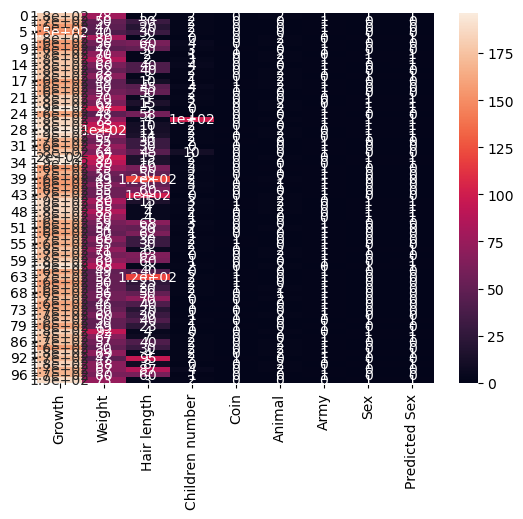

In [93]:
sns.heatmap(df_cut_test, annot=True)

C:\Users\Я\AppData\Local\Temp\ipykernel_17072\2862412127.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")


<AxesSubplot: xlabel='Task', ylabel='Model'>

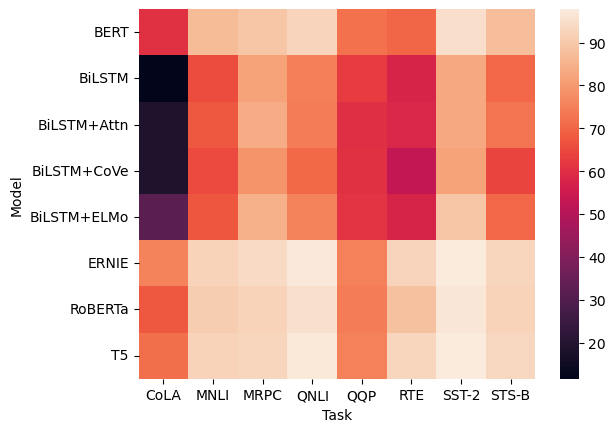

In [95]:
glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")
sns.heatmap(glue)

In [158]:
coder2=preprocessing.LabelEncoder()
for name in df.select_dtypes(include=['object']).columns:
    coder2.fit(df[name])
    df[name]=coder2.transform(df[name])

    
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          118 non-null    int64  
 1   Growth                       118 non-null    int64  
 2   Shoe size                    118 non-null    int64  
 3   Course number                118 non-null    int64  
 4   Year of birth                118 non-null    int64  
 5   Friend number                118 non-null    int64  
 6   Russian rating               118 non-null    int64  
 7   Maths rating                 118 non-null    int64  
 8   Physics rating               118 non-null    int64  
 9   Computer science rating      118 non-null    int64  
 10  Chemistry rating             118 non-null    int64  
 11  Literature rating            118 non-null    int64  
 12  History rating               118 non-null    int64  
 13  Geography rating    

In [219]:
from sklearn.ensemble import ExtraTreesClassifier
selector=ExtraTreesClassifier()
result=selector.fit(df[df.columns], df['Your insitute'])
table_feaches=pd.DataFrame(result.feature_importances_,index=df.columns,columns=['0'])
table_feaches.sort_values(by='0',ascending=False)
table_feaches

,0
Age,0.012679
Growth,0.016672
Shoe size,0.014322
Course number,0.008411
Year of birth,0.011261
Friend number,0.013381
Russian rating,0.012540
Maths rating,0.063752
Physics rating,0.010021
Computer science rating,0.075138


In [204]:
table_feaches

,0
Age,0.012957
Growth,0.017480
Shoe size,0.019562
Course number,0.007654
Year of birth,0.011207
Friend number,0.014010
Russian rating,0.011180
Maths rating,0.054042
Physics rating,0.009457
Computer science rating,0.067746


In [248]:
x=[4,5,6,8]
x2=[8,6,5,4]
result2=0
result2+=x2[0]*10**3
result2+=x2[1]*10**2
result2+=x2[2]*10**1
result2+=x2[3]*10**0
result2

8654

In [266]:
def kaprekar_step(L):
    x1=L
    x2=L
    x1.sort()
    print(x1)
    i=0
    result1=0
    result2=0
    while i<=3:
        result1+=x1[i]*10**(3-i)
        i+=1
    i=0
    x2.sort(reverse=True)
    print(x1)
    while i<=3:
        result2+=x2[i]*10**(3-i)
        i+=1
    return result1-result2 if result1>result2 else result2-result1


kaprekar_step([4,5,6,8])
# L=[4,5,6,8]
# x1=L
# x2=L
# x1.sort()
# #x2.sort(reverse=True)
# x2,x1

[4, 5, 6, 8]
[8, 6, 5, 4]


4086

In [254]:
a = [5, 2, 3, 1, 4]
a.sort(reverse=True)
a

[5, 4, 3, 2, 1]

In [286]:
#4, 5, 5.5, 3, 4, 5.5, 2, 5, 7
import numpy as np
s=list(input().replace(' ','').split(','))
s = [float(item) for item in s]

V1 = np.array(s)
V2 = np.array([s[len(s)-2]])
V3=np.array(s[::-1])
V4=np.array(range(0,len(s),2))
V5 = np.array(range(len(s)))
print(V1)
print(V2)
print(V3)
print(V5)

4, 5
[4. 5.]
[4.]
[5. 4.]
[0 1]
